In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
%matplotlib inline
import geopandas as gpd
import seaborn as sns

#Lectura del archivo original
eventsData = pd.read_csv(r"C:\Users\brian\Desktop\Datos\Nueva carpeta\Datos-master\Datos-master\fiuba-trocafone-tp1-final-set\events.csv",low_memory = False)

In [2]:
def agregarNacionalidadRegionYCiudad(df):
    userscountry = {}
    usersregion ={}
    userscity = {}
    df = eventsData
    df = df[["event","person","country","region","city"]]
    df= df[df["event"] == "visited site"]
    df = df.drop_duplicates(keep="first")
    df = df.set_index("person")
    for user, row in df.iterrows():
        userscountry[user] = row["country"]
        usersregion[user] =row["region"]
        userscity[user] = row["city"]
    return userscountry,usersregion,userscity

In [3]:
def capitalize_words(string):
    words = string.split()
    return ' '.join([word.capitalize() for word in words])

In [4]:
urls={}
for url in eventsData["url"].dropna():
    if(len(url)>1):
        stringModelo = url.split("/")[2:]
        if(len(stringModelo)>1):
            
            stringModelo1 = stringModelo[1].split("-")
            
            if(stringModelo[0] == stringModelo1[0]):
                urls[url] = capitalize_words(" ".join(stringModelo1))
            else:
                urls[url] = capitalize_words(" ".join([stringModelo[0]]+stringModelo1))
        else:
            #print(stringModelo)
            urls[url] = capitalize_words(" ".join(stringModelo))

In [5]:
eventsData["model"] = eventsData["model"].fillna(eventsData["url"].map(urls))

In [6]:
df = eventsData[eventsData["event"] == "ad campaign hit"]
df["model"].value_counts().head()

Iphone       4652
Samsung      3684
Iphone 6s    3393
Iphone 6     3228
Iphone 5s    2781
Name: model, dtype: int64

In [7]:
eventsData["model"] = eventsData["model"].map(lambda x: x.lower() if ((not pd.isnull(x)) )else x)

In [8]:
userscountry,usersregion,userscity = agregarNacionalidadRegionYCiudad(eventsData)
eventsData["country"] = eventsData["country"].fillna(eventsData["person"].map(userscountry))
eventsData["region"] = eventsData["region"].fillna(eventsData["person"].map(usersregion))
eventsData["city"] = eventsData["city"].fillna(eventsData["person"].map(userscity))

In [9]:
eventsData.to_csv('EventsConMenosNans.csv')

In [10]:
#Leo el nuevo archivo con mas datos
eventsData = pd.read_csv(r'C:\Users\brian\Desktop\Datos\Nueva carpeta\Datos-master\Datos-master\EventsConMenosNans.csv',low_memory = False)

In [11]:
#Archivo con la plantilla
shapeBrasil= r'C:\Users\brian\Desktop\Datos\Nueva carpeta\Brazil_Admin_1.shp'
mapBrasil = gpd.read_file(shapeBrasil)

#Creacion del data frame que contiene la cantidad de eventos por region.
dataFilteredByBrazil = eventsData[eventsData['country'].map(lambda x: ( x== 'Brazil'))]
regionData = pd.DataFrame(dataFilteredByBrazil["region"].value_counts())
regionData = regionData.drop(['Unknown'])
regionData.columns = ['cantidad de eventos']

#Merge del archivo plantilla con los datos filtrados por region
merged = mapBrasil.set_index('NAME_1').join(regionData)


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\colors.py:504: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


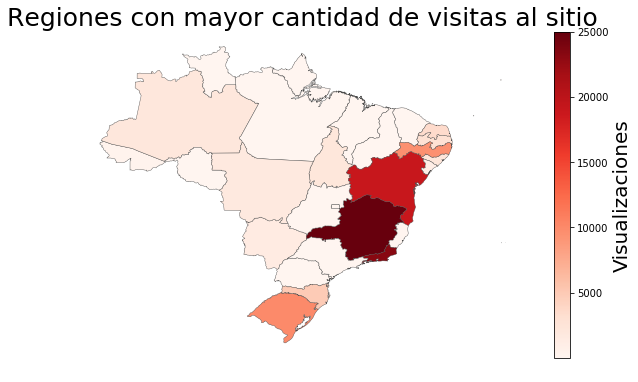

In [12]:
#Creacion de la visualizacion
#Plot basico
column = 'cantidad de eventos'
fig, ax = plt.subplots(1, figsize=(10, 6))
merged.plot(column=column, cmap='Reds', linewidth= 0.4 , ax=ax, edgecolor= '0.3')

#Le saco los ejes
ax.axis('off')

#Titulo
ax.set_title('Regiones con mayor cantidad de visitas al sitio', fontdict={'fontsize': '25', 'fontweight' : '3'})

#Barra indicadora
vmin, vmax = 10, 25000
sm = plt.cm.ScalarMappable(cmap='Reds', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm)
cbar.set_label('Visualizaciones',size = 20)
#Guardar mapa
fig.savefig('map_export.png', dpi=300)

In [13]:
#Analisis por condicion y modelo
#Creacion de un dataframe con esta informacion
modelAndConditionData = pd.DataFrame({'cantidad':dataFilteredByBrazil.groupby(['condition','model','event']).size()})
modelAndConditionData = modelAndConditionData.reset_index()
modelAndConditionData = modelAndConditionData.sort_values('cantidad',ascending = False)

#Filtramos por el evento viewed product
modelAndConditionViewData = modelAndConditionData[modelAndConditionData['event'].map(lambda x: ( x== 'viewed product'))]
modelAndConditionViewData

,condition,model,event,cantidad
45,Bom,iphone 6,viewed product,19960
50,Bom,iphone 6s,viewed product,12964
903,Muito Bom,iphone 5s,viewed product,12013
488,Excelente,iphone 6,viewed product,11265
494,Excelente,iphone 6s,viewed product,11228
912,Muito Bom,iphone 6s,viewed product,11178
42,Bom,iphone 5s,viewed product,11135
906,Muito Bom,iphone 6,viewed product,10402
56,Bom,iphone 7,viewed product,10174
353,Bom,samsung galaxy s7 edge,viewed product,9958


In [14]:
#Sabiendo cuales son los mas populares, creo un set que los contenga
morePopular = ['iphone 6s','iphone 6','iphone 5s','samsung galaxy s7 edge']

modelAndConditionViewData = modelAndConditionViewData[modelAndConditionViewData['model'].map(lambda x : (x in morePopular))]
modelAndConditionViewData = modelAndConditionViewData.sort_values('cantidad',ascending = False)
modelAndConditionViewData


,condition,model,event,cantidad
45,Bom,iphone 6,viewed product,19960
50,Bom,iphone 6s,viewed product,12964
903,Muito Bom,iphone 5s,viewed product,12013
488,Excelente,iphone 6,viewed product,11265
494,Excelente,iphone 6s,viewed product,11228
912,Muito Bom,iphone 6s,viewed product,11178
42,Bom,iphone 5s,viewed product,11135
906,Muito Bom,iphone 6,viewed product,10402
353,Bom,samsung galaxy s7 edge,viewed product,9958
485,Excelente,iphone 5s,viewed product,8808


In [15]:
#Creo un pivot para luego graficar.-

pivot = modelAndConditionViewData.pivot("model", "condition", "cantidad")
pivot = pivot.fillna(value = 0)
pivot

condition,Bom,Bom - Sem Touch ID,Excelente,Muito Bom
model,,,,
iphone 5s,11135.0,8549.0,8808.0,12013.0
iphone 6,19960.0,3962.0,11265.0,10402.0
iphone 6s,12964.0,398.0,11228.0,11178.0
samsung galaxy s7 edge,9958.0,0.0,6250.0,5864.0


Text(0,0.5,'Visualizaciones')

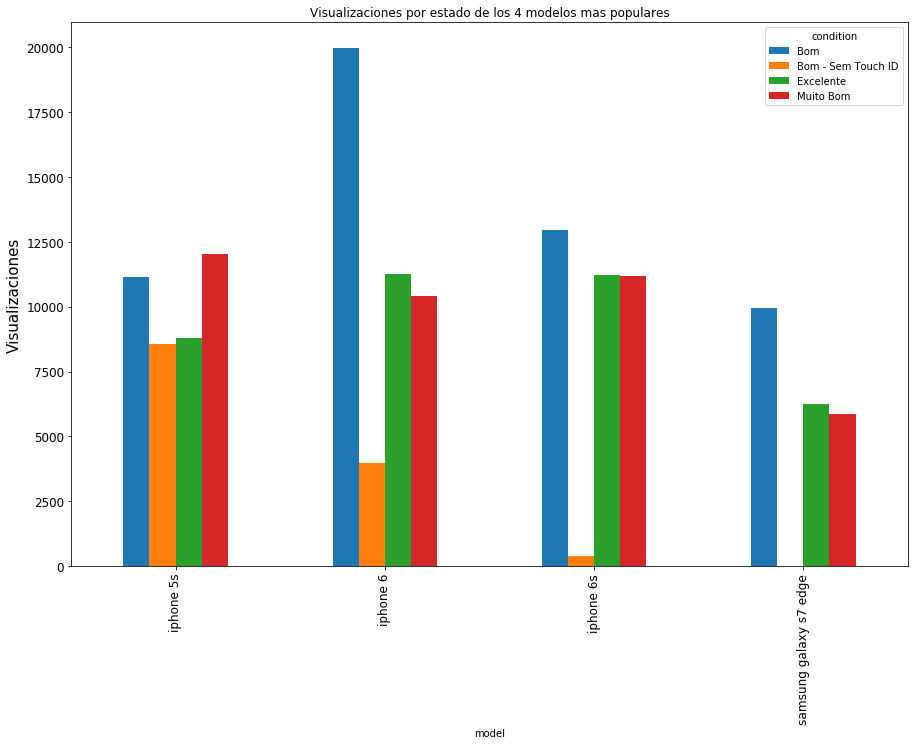

In [16]:
#Realizo el plot
categories = pivot.columns
ax = pivot[categories].plot(kind='bar', title ="Visualizaciones por estado de los 4 modelos mas populares", figsize=(15, 10), legend=True, fontsize=12)
ax.set_ylabel('Visualizaciones',size = 15)

In [17]:
#Realizamos el mismo analisis que antes, pero ahora filtrando por checkout
modelAndConditionCheckoutData = modelAndConditionData[modelAndConditionData['event'].map(lambda x: ( x== 'checkout'))]
modelAndConditionCheckoutData

,condition,model,event,cantidad
43,Bom,iphone 6,checkout,1444
252,Bom,samsung galaxy j5,checkout,1269
48,Bom,iphone 6s,checkout,784
901,Muito Bom,iphone 5s,checkout,777
486,Excelente,iphone 6,checkout,774
492,Excelente,iphone 6s,checkout,751
407,Bom - Sem Touch ID,iphone 5s,checkout,681
910,Muito Bom,iphone 6s,checkout,640
40,Bom,iphone 5s,checkout,611
904,Muito Bom,iphone 6,checkout,597


In [18]:
#Para que tenga sentido la comparacion, vamos a elegir los mismos 4 modelos que antes.
modelAndConditionCheckoutData = modelAndConditionCheckoutData[modelAndConditionCheckoutData['model'].map(lambda x: (x in morePopular))]
modelAndConditionCheckoutData = modelAndConditionCheckoutData.sort_values('cantidad',ascending = False)
modelAndConditionCheckoutData

,condition,model,event,cantidad
43,Bom,iphone 6,checkout,1444
48,Bom,iphone 6s,checkout,784
901,Muito Bom,iphone 5s,checkout,777
486,Excelente,iphone 6,checkout,774
492,Excelente,iphone 6s,checkout,751
407,Bom - Sem Touch ID,iphone 5s,checkout,681
910,Muito Bom,iphone 6s,checkout,640
40,Bom,iphone 5s,checkout,611
904,Muito Bom,iphone 6,checkout,597
483,Excelente,iphone 5s,checkout,496


In [19]:
#Creo un pivot para luego graficar
pivot = modelAndConditionCheckoutData.pivot("model", "condition", "cantidad")
pivot = pivot.fillna(value = 0)
pivot

condition,Bom,Bom - Sem Touch ID,Excelente,Muito Bom
model,,,,
iphone 5s,611.0,681.0,496.0,777.0
iphone 6,1444.0,281.0,774.0,597.0
iphone 6s,784.0,23.0,751.0,640.0
samsung galaxy s7 edge,331.0,0.0,288.0,160.0


Text(0,0.5,'Ventas')

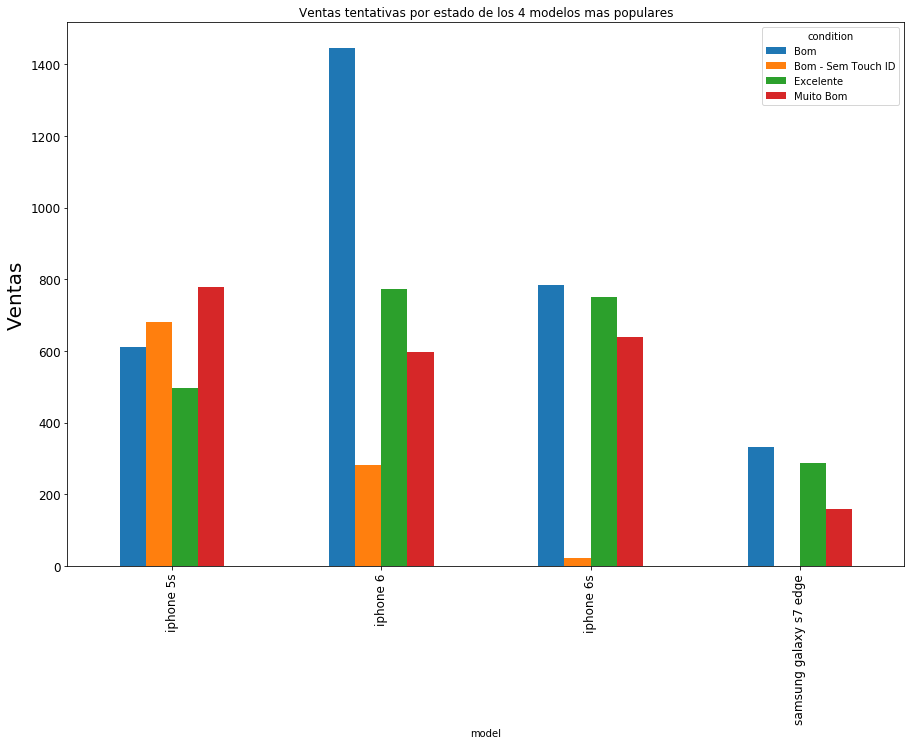

In [20]:
#Realizo el plot
categories = pivot.columns
ax = pivot[categories].plot(kind='bar', title ="Ventas tentativas por estado de los 4 modelos mas populares", figsize=(15, 10), legend=True, fontsize=12)
ax.set_ylabel('Ventas',size = 20)

In [21]:
#Creo un dataframe agrupando por color, evento y modelo
colorData = pd.DataFrame({'cantidad' :eventsData.groupby(['model','color','event']).size()})
colorData = colorData.reset_index()

#Solo voy a analizar los eventos conversion
colorData = colorData[colorData['event'].map(lambda x: ( x== 'conversion'))]
colorData = colorData.sort_values('cantidad',ascending = False)
colorData



,model,color,event,cantidad
805,samsung galaxy j5,Dourado,conversion,52
144,iphone 5s,Cinza espacial,conversion,40
156,iphone 6,Dourado,conversion,25
153,iphone 6,Cinza espacial,conversion,25
147,iphone 5s,Dourado,conversion,25
426,motorola moto g3 4g,Preto,conversion,22
808,samsung galaxy j5,Preto,conversion,21
159,iphone 6,Prateado,conversion,21
1069,samsung galaxy s6 flat,Dourado,conversion,21
176,iphone 6s,Ouro Rosa,conversion,20


In [22]:
#Filtro por los 4 modelos mas populares igual que hice antes
popularModels = ['samsung galaxy j5','iphone 5s','iphone 6','motorola moto g3 4g']
colorData = colorData[colorData['model'].map(lambda x: ( x in popularModels))]
colorData = colorData[colorData['cantidad'].map(lambda x: ( x >=2))]
colorData = colorData.sort_values('cantidad',ascending = False)


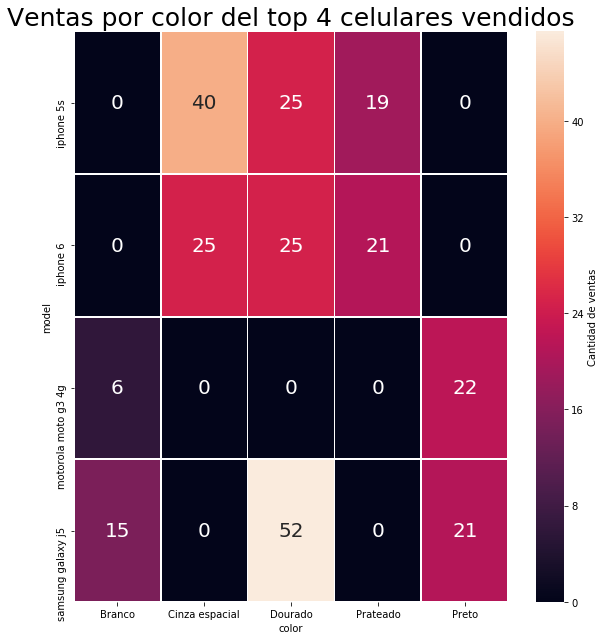

In [23]:
#Creo el pivot que voy a utilizar 
pivot = colorData.pivot("model", "color", "cantidad")
pivot = pivot.fillna(value = 0)
#Dibujo el heatmap

f, ax = plt.subplots(figsize=(9, 9))
ax.set_title('Ventas por color del top 4 celulares vendidos',size = 25)

sns.heatmap(pivot, annot= True , annot_kws={"size": 20}, fmt=".0f", linewidths=.9, ax=ax, robust =True, cbar_kws={'label': 'Cantidad de ventas'})
plt.tight_layout()

f.savefig('ventasPorColor.png')

In [24]:
#Creo un dataFrame con los modelos mas populares y sus correspondientes eventos y storage

viewAndStorageData = pd.DataFrame({'cantidadAlmacenamiento' :eventsData.groupby(['model','storage','event']).size()})
viewAndStorageData = viewAndStorageData.reset_index()

#Voy a analizar aquellos que no llegan a conversion
viewAndStorageData = viewAndStorageData[viewAndStorageData['event'].map(lambda x: ( x== 'viewed product'))]
viewAndStorageData = viewAndStorageData.sort_values('cantidadAlmacenamiento',ascending = False)

#Para que pueda ordenar el heat, tengo que pasar los strings a numeros
viewAndStorageData['storage'] = viewAndStorageData['storage'].map(lambda x: 16 if (x == '16GB') else x)
viewAndStorageData['storage'] = viewAndStorageData['storage'].map(lambda x: 32 if (x == '32GB') else x)
viewAndStorageData['storage'] = viewAndStorageData['storage'].map(lambda x: 64 if (x == '64GB') else x)
viewAndStorageData['storage'] = viewAndStorageData['storage'].map(lambda x: 128 if (x == '128GB') else x)
viewAndStorageData['storage'] = viewAndStorageData['storage'].map(lambda x: 8 if (x == '8GB') else x)
viewAndStorageData


,model,storage,event,cantidadAlmacenamiento
147,iphone 6,16,viewed product,25915
135,iphone 5s,16,viewed product,22080
574,samsung galaxy s7 edge,32,viewed product,21304
569,samsung galaxy s7,32,viewed product,18085
164,iphone 6s,16,viewed product,16530
577,samsung galaxy s8,64,viewed product,15868
150,iphone 6,64,viewed product,15405
189,iphone 7,32,viewed product,12968
138,iphone 5s,32,viewed product,11626
170,iphone 6s,64,viewed product,11331


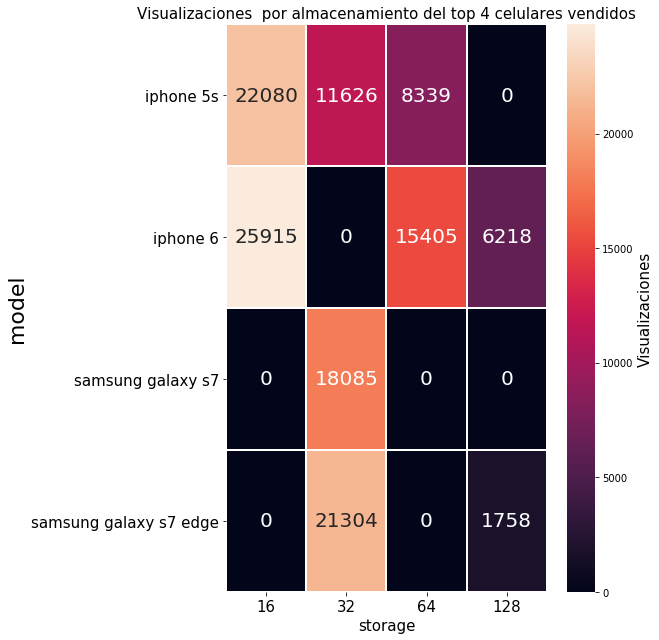

In [25]:
morePopularModels =['iphone 6','iphone 5s','samsung galaxy s7 edge','samsung galaxy s7']

viewAndStorageData = viewAndStorageData[viewAndStorageData['model'].map(lambda x: ( x in morePopularModels))]
#Creo el pivot. Lleno de ceros donde corresponda y ordeno el indice
pivot = viewAndStorageData.pivot("model", "storage", "cantidadAlmacenamiento")
pivot = pivot.fillna(value = 0)
pivot.sort_index(level=0, ascending=True, inplace=True)

#Grafico del heatmap
f, ax = plt.subplots(figsize=(9, 9))
ax.set_title('Visualizaciones  por almacenamiento del top 4 celulares vendidos', size = 15)
plt.yticks(size = 15, multialignment = 'left')
plt.xticks(size = 15, multialignment = 'left')
sns.heatmap(pivot, annot= True , annot_kws={"size": 20}, fmt=".0f", linewidths=.9, ax=ax, robust =True, cbar_kws={'label': 'Visualizaciones'})
#Acomodo size de labels
ax.figure.axes[-1].yaxis.label.set_size(15)
ax.figure.axes[0].yaxis.label.set_size(22)
ax.figure.axes[0].xaxis.label.set_size(15)
plt.tight_layout()

f.savefig('visualizaciones_almacenamiento.png')



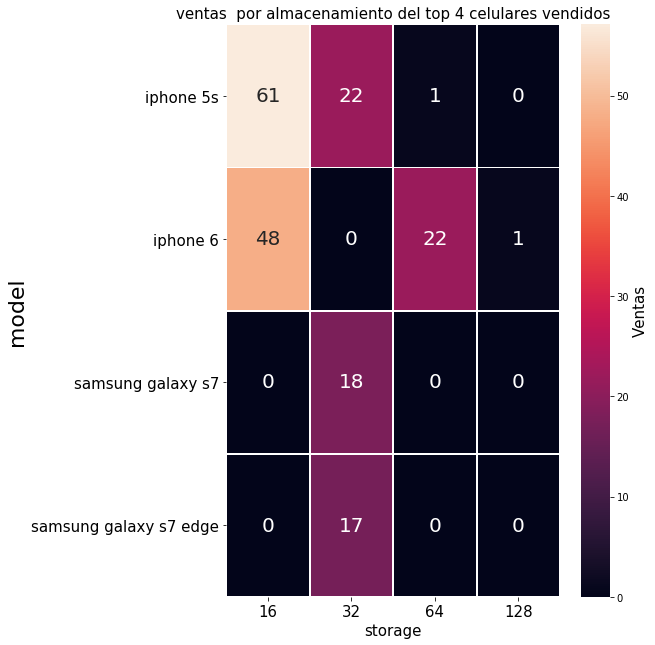

In [26]:
#Creo un dataFrame con los modelos mas populares y sus correspondientes eventos y storage

conversionAndStorageData = pd.DataFrame({'cantidadAlmacenamiento' :eventsData.groupby(['model','storage','event']).size()})
conversionAndStorageData = conversionAndStorageData.reset_index()
#Voy a analizar aquellos que  llegan a conversion
conversionAndStorageData = conversionAndStorageData[conversionAndStorageData['event'].map(lambda x: ( x== 'conversion'))]
conversionAndStorageData = conversionAndStorageData.sort_values('cantidadAlmacenamiento',ascending = False)

#Para que pueda ordenar el heat, tengo que pasar los strings a numeros. Para poder comparar, deseo excluir los que tienen 4 gb
conversionAndStorageData['storage'] = conversionAndStorageData['storage'].map(lambda x: 16 if (x == '16GB') else x)
conversionAndStorageData['storage'] = conversionAndStorageData['storage'].map(lambda x: 32 if (x == '32GB') else x)
conversionAndStorageData['storage'] = conversionAndStorageData['storage'].map(lambda x: 64 if (x == '64GB') else x)
conversionAndStorageData['storage'] = conversionAndStorageData['storage'].map(lambda x: 8 if (x == '8GB') else x)
conversionAndStorageData['storage'] = conversionAndStorageData['storage'].map(lambda x: 128 if (x == '128GB') else x)
conversionAndStorageData = conversionAndStorageData[conversionAndStorageData['storage'].map(lambda x: ( x!= '4GB'))]
conversionAndStorageData = conversionAndStorageData[conversionAndStorageData['model'].map(lambda x: ( x in morePopularModels ))]

#Creo el pivot. Lleno de ceros donde corresponda y ordeno el indice
pivot = conversionAndStorageData.pivot("model", "storage", "cantidadAlmacenamiento")
pivot = pivot.fillna(value = 0)
pivot.sort_index(level=0, ascending=True, inplace=True)

#Grafico del heatmap
f, ax = plt.subplots(figsize=(9, 9))
ax.set_title('ventas  por almacenamiento del top 4 celulares vendidos', size = 15)
plt.yticks(size = 15, multialignment = 'left')
plt.xticks(size = 15, multialignment = 'left')
sns.heatmap(pivot, annot= True , annot_kws={"size": 20}, fmt=".0f", linewidths=.9, ax=ax, robust =True, cbar_kws={'label': 'Ventas'})
f.tight_layout()
ax.figure.axes[-1].yaxis.label.set_size(15)
ax.figure.axes[0].yaxis.label.set_size(22)
ax.figure.axes[0].xaxis.label.set_size(15)

f.savefig('ventas_Almacenamiento.png')